In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [3]:
np.dot(price, unit)

array([34400, 50000, 64400])

In [5]:
epsilon = 1e-15
y_preds = [1, 1, 0, 0, 1]
y_preds_new = [max(i, epsilon) for i in y_preds]
y_preds_new

[1, 1, 1e-15, 1e-15, 1]

In [6]:
y_preds_new = [min(i, 1-epsilon) for i in y_preds_new]
y_preds_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [7]:
y_preds_new = np.array(y_preds_new)
np.log(y_preds_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [8]:
np.log(y_preds)

<ipython-input-8-03b498040291>:1: RuntimeWarning: divide by zero encountered in log
  np.log(y_preds)


array([  0.,   0., -inf, -inf,   0.])

In [6]:
data = pd.read_csv('homeprices_banglore.csv')
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      20 non-null     int64  
 1   bedrooms  20 non-null     int64  
 2   price     20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [8]:
def scaling(column):
    return column/max(column)

In [10]:
scaling(data.area)

0     0.285405
1     0.702703
2     0.389189
3     0.411081
4     0.324324
5     0.316216
6     0.738378
7     0.891892
8     0.354054
9     1.000000
10    0.486486
11    0.752703
12    0.270270
13    0.297297
14    0.608108
15    0.317568
16    0.318919
17    0.416216
18    0.748649
19    0.216216
Name: area, dtype: float64

In [15]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(data.drop('price', axis = 1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [33]:
scaled_y = sy.fit_transform(np.asarray(data.price).reshape(data.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [37]:
w = np.ones(shape = scaled_X.shape[1])
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [81]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(shape = number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T)+b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [82]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

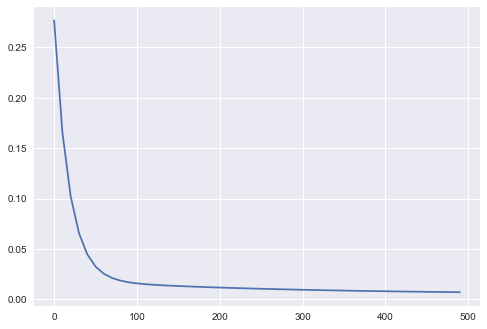

In [83]:
plt.plot(epoch_list, cost_list)
plt.show()

In [84]:
def prediction(area, bedroom, w, b):
    scaled_X = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
prediction(2600, 4, w, b)

128.45484403267596

In [85]:
prediction(1000, 2, w, b)

30.253094462442355

In [86]:
prediction(1500, 3, w, b)

69.47860785714694

In [99]:
from random import randint

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = randint(0, total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_X.T)+b
        
        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.square(sample_y-y_predicted) # MSE
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [100]:
w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 10000)
w, b, cost

(array([0.70703659, 0.67654618]), -0.230838290873808, 0.05339304923896949)

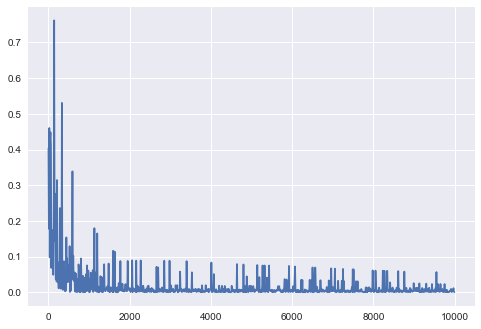

In [102]:
plt.plot(epoch_list, cost_list);

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):

Exercise: GPU performance for fashion mnist dataset
This notebook is derived from a tensorflow tutorial here: https://www.tensorflow.org/tutorials/keras/classification So please refer to it before starting work on this exercise

You need to write code wherever you see your code goes here comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers

2.5.0


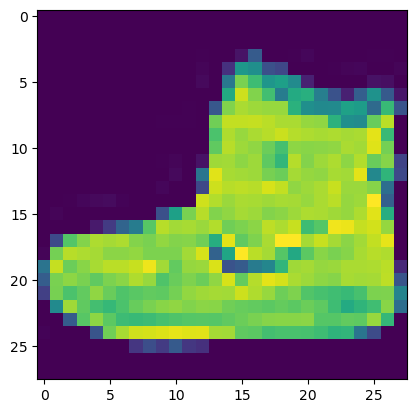

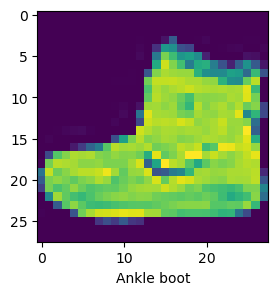

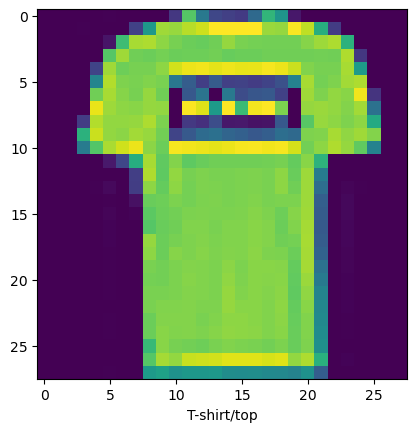

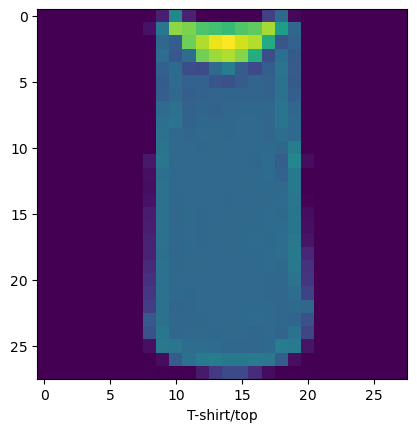

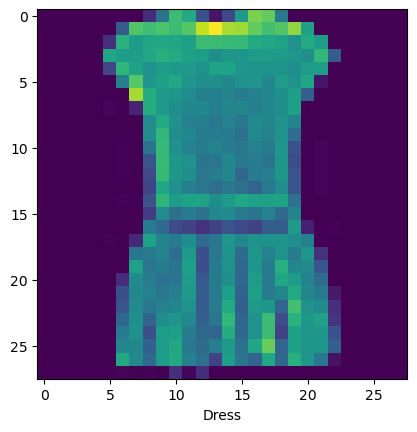

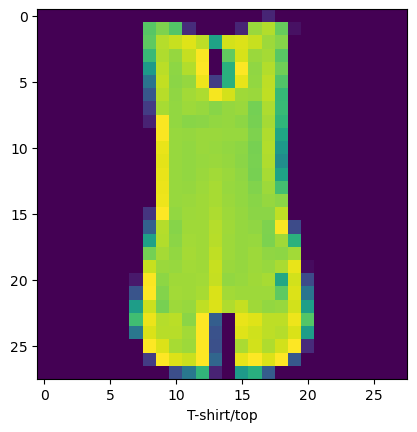

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape
plt.imshow(train_images[0])
train_labels[0]
class_names[train_labels[0]]
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [10]:
input_shape = train_images_scaled.shape[-2:]
input_shape

(28, 28)

In [12]:
def get_model(hidden_layers=1):
    layers = []
    # Your code goes here-----------START
    # Create Flatten input layers
    # Create hidden layers that are equal to hidden_layers argument in this function
    # Create output 
    # Your code goes here-----------END
    
    input_shape = train_images_scaled.shape[-2:]
    layers.append(keras.layers.Flatten(input_shape = input_shape))
    
    for i in range(1, hidden_layers+1):
        layers.append(keras.layers.Dense(int(input_shape[0]/(i*2)), activation = 'relu'))
    layers.append(keras.layers.Dense(10, activation = 'sigmoid'))
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)
model.predict(test_images_scaled)[2]
test_labels[2]
tf.config.experimental.list_physical_devices() 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5907 - accuracy: 0.7956
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4306 - accuracy: 0.8474
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4021 - accuracy: 0.8575
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3867 - accuracy: 0.8610
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3752 - accuracy: 0.8664


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
# 5 Epochs performance comparison for 1 hidden layer
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
     model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

In [ ]:
# 5 Epocs performance comparison with 5 hidden layers
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    # your code here


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    # your code here


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df1 = df.copy()
df1.drop('customerID', axis = 1, inplace = True)
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors = 'coerce')

In [6]:
df1.dropna(inplace = True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [8]:
df1.TotalCharges.hist(bins = 20);

In [9]:
sns.histplot(df1, x = 'tenure', hue = 'Churn', multiple = 'dodge');

In [10]:
def print_unique_columns(data):

    column_list = list(set(data.columns)-set(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']))

    for i in column_list:
        print(f'{i}: {data[i].unique()}\n count: {data[i].unique().shape[0]}')

print_unique_columns(df1)

SeniorCitizen: [0 1]
 count: 2
Dependents: ['No' 'Yes']
 count: 2
MultipleLines: ['No phone service' 'No' 'Yes']
 count: 3
InternetService: ['DSL' 'Fiber optic' 'No']
 count: 3
TechSupport: ['No' 'Yes' 'No internet service']
 count: 3
OnlineSecurity: ['No' 'Yes' 'No internet service']
 count: 3
PhoneService: ['No' 'Yes']
 count: 2
Churn: ['No' 'Yes']
 count: 2
OnlineBackup: ['Yes' 'No' 'No internet service']
 count: 3
Partner: ['Yes' 'No']
 count: 2
DeviceProtection: ['No' 'Yes' 'No internet service']
 count: 3
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 count: 4
gender: ['Female' 'Male']
 count: 2
StreamingMovies: ['No' 'Yes' 'No internet service']
 count: 3
Contract: ['Month-to-month' 'One year' 'Two year']
 count: 3
StreamingTV: ['No' 'Yes' 'No internet service']
 count: 3
PaperlessBilling: ['Yes' 'No']
 count: 2


In [11]:
df1.replace('No phone service', 'No', inplace = True)
df1.replace('No internet service', 'No', inplace = True)

In [12]:
yes_no_columns = ['Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [13]:
df1.replace({'Female': 1, 'Male': 0}, inplace = True)

In [14]:
col = ['InternetService', 'Contract', 'PaymentMethod']

df2 = pd.get_dummies(data = df1, columns = col)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [15]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3870,1,0,1,0,68,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
6503,0,0,1,1,70,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4581,0,0,0,0,58,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6733,0,0,0,0,27,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
787,1,0,1,0,34,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [16]:
print_unique_columns(df2)

InternetService_Fiber optic: [0 1]
 count: 2
InternetService_DSL: [1 0]
 count: 2
SeniorCitizen: [0 1]
 count: 2
Dependents: [0 1]
 count: 2
MultipleLines: [0 1]
 count: 2
TechSupport: [0 1]
 count: 2
Contract_One year: [0 1]
 count: 2
OnlineSecurity: [0 1]
 count: 2
PhoneService: [0 1]
 count: 2
Contract_Two year: [0 1]
 count: 2
PaymentMethod_Bank transfer (automatic): [0 1]
 count: 2
Churn: [0 1]
 count: 2
InternetService_No: [0 1]
 count: 2
OnlineBackup: [1 0]
 count: 2
PaymentMethod_Mailed check: [0 1]
 count: 2
Partner: [1 0]
 count: 2
DeviceProtection: [0 1]
 count: 2
Contract_Month-to-month: [1 0]
 count: 2
gender: [1 0]
 count: 2
PaymentMethod_Electronic check: [1 0]
 count: 2
StreamingMovies: [0 1]
 count: 2
PaymentMethod_Credit card (automatic): [0 1]
 count: 2
StreamingTV: [0 1]
 count: 2
PaperlessBilling: [1 0]
 count: 2


In [17]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [18]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2[cols_to_scale].sample(3)

,tenure,MonthlyCharges,TotalCharges
5523,0.084507,0.506965,0.052937
4205,0.323944,0.600498,0.210922
3760,0.028169,0.550746,0.024660


In [19]:
X = df2.drop('Churn', axis = 1)
y = df2.Churn

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [30]:
from sklearn.metrics import classification_report

def ANN(X_train, X_test, y_train, y_test, loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weight = weights)
    model.evaluate(X_test, y_test)
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print(classification_report(y_test, y_preds))
    
    return y_preds

In [31]:
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6278 - accuracy: 0.6769
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.7552
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.76 - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 2ms/step -

In [32]:
class_0, class_1 = df2.Churn.value_counts()
df_class_0 = df2[df2.Churn == 0]
df_class_1 = df2[df2.Churn == 1]

In [33]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

# method 1: undersampling

In [34]:
df_class_0_under = df_class_0.sample(class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test_under.shape

(3738, 27)

In [35]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [36]:
X = df_test_under.drop('Churn', axis = 1)
y = df_test_under.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 15)

In [37]:
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6217 - accuracy: 0.6649
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7589
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7642
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7635
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8164
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8114
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8127
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8134
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8100
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8127
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8201
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8167
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8167
Epoch 93/100


In [38]:
class_0, class_1

(5163, 1869)

# method 2: over sampling (blind copying)

In [39]:
df_class_1_over = df_class_1.sample(class_0, replace = True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

In [40]:
X = df_test_under.drop('Churn', axis = 1)
y = df_test_under.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 15)

In [41]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [42]:
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6019 - accuracy: 0.6712
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7472
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7575
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7592
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7632
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7709
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8164
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8197
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8147
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8157
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8157
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8204
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8227
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8201
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8187
Epoch 93/100


# method 3: oversampling (SMOTE)

In [46]:
from imblearn.over_sampling import SMOTE

X = df_test_under.drop('Churn', axis = 1)
y = df_test_under.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 15)

smote = SMOTE(sampling_strategy = 'minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [47]:
y_train_sm.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [48]:
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6546 - accuracy: 0.6408
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7538
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7579
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4854 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7672
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.7645
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7649
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7686
Epoch 11/

# method 4: ensemble method with undersampling

In [49]:
X = df2.drop('Churn', axis = 1)
y = df2.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 15)

In [52]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [54]:
df3_class_0 = df3[df3.Churn == 0]
df3_class_1 = df3[df3.Churn == 1]

In [55]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [63]:
def get_train_batch(df_majority, df_minority, start, end):

    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)
    X_train = df_train.drop('Churn', axis = 1)
    y_train = df_train.Churn
    
    return X_train, y_train
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

In [65]:
y_pred1 = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5958 - accuracy: 0.7030
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7629
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7656
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7753
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7716
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8167
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8130
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8171
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8204
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8137
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8134
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8164
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8227
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8187
Epoch 93/100


In [66]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)
y_pred2 = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)
y_pred3 = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6302 - accuracy: 0.6575
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7488
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7595
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7689
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8159
Epoch 60/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8209
Epoch 61/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8243
Epoch 62/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8231
Epoch 63/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8216
Epoch 64/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8224
Epoch 65/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8239
Epoch 66/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8178
Epoch 67/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8243
Epoch 68/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8247
Epoch 69/100


In [68]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred_final)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [69]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



In [183]:
data = pd.read_csv('sonar.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [186]:
data.isna().sum().unique()

array([0])

In [189]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [190]:
X = data.drop(60, axis = 1)
y = data[60]

In [191]:
y = pd.get_dummies(y, drop_first = True)
y

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [192]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [196]:
X_train.shape, X_test.shape

((166, 60), (42, 60))

In [198]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
21/21 [==============================] - 2s 3ms/step - loss: 0.6786 - accuracy: 0.5783
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6566
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6325
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7711
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.8072
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7892
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8012
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8193
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8494
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8795
Epoch 11/

In [200]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 1.1471 - accuracy: 0.7619


[1.1470587253570557, 0.761904776096344]

In [203]:
y_pred = model.predict(X_test).reshape(-1)
y_pred = np.round(y_pred)
y_pred[:10]

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1.], dtype=float32)

In [205]:
y_test[:10].T

,186,155,165,200,58,34,151,18,202,62
R,0,0,0,0,1,1,0,1,0,1


In [206]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42



In [207]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.7372 - accuracy: 0.5181
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.5361
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5602
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.5422
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.5181
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5181
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5542
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.5723
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6791 - accuracy: 0.6084
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.5843
Epoch 11/

21/21 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8675
Epoch 84/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8855
Epoch 85/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.8735
Epoch 86/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8614
Epoch 87/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9398
Epoch 88/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.9096
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8855
Epoch 90/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.8795
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8855
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.9157
Epoch 93/100


In [208]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5443 - accuracy: 0.7381


[0.5442798733711243, 0.738095223903656]

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        batch_index = int(number_of_features/epochs)
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

In [3]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 1. undersampling

In [6]:
class0_count, class1_count = data.Exited.value_counts()
data_class0 = data[data.Exited == 0]
data_class1 = data[data.Exited == 1]

In [7]:
class0_count, class1_count

(7963, 2037)

In [17]:
data_class0_under = data_class0.sample(class1_count)
data_under = pd.concat([data_class0_under, data_class1], axis = 0).sample(frac = 1)
data_under.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2037,2038,15678146,Wong,668,Spain,Female,24,7,173962.32,1,0,0,106457.11,1
1180,1181,15570326,Wilkins,621,France,Male,34,6,0.00,2,1,1,99128.13,0
4436,4437,15664498,Golovanov,508,France,Male,26,7,205962.00,1,1,0,156424.40,0
6087,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
1829,1830,15605275,Ofodile,725,Germany,Male,45,8,116917.07,1,0,0,173464.43,1


In [19]:
data_under.Exited.value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

# 2. oversampling

In [23]:
data_class1_over = data_class1.sample(class0_count, replace = True)
data_over = pd.concat([data_class1_over, data_class0], axis = 0).sample(frac = 1)
data_over.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2915,2916,15617482,Milanesi,489,Germany,Female,52,1,131441.51,1,1,0,37240.11,1
2381,2382,15774151,Iadanza,614,Spain,Female,41,7,179915.85,1,0,0,14666.35,1
6431,6432,15683363,Goddard,540,Spain,Male,39,1,0.00,1,0,1,108419.41,0
4790,4791,15642022,Zito,621,Spain,Male,34,8,0.00,1,0,0,47972.65,0
9220,9221,15600399,Trentino,598,France,Male,60,4,0.00,1,1,0,197727.14,1


In [24]:
data_over.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# 3. oversampling (SMOTE)

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [27]:
X = data.drop('Exited', axis = 1)
y = data.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, 
                                                   random_state = 42)

In [29]:
smote = SMOTE(sampling_strategy = 'minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Walton'

# 4. ensemble method

In [ ]:
X = data.drop('Exited', axis = 1)
y = data.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42,
                                                   test_size = 0.2)
df3 = X_train.copy()
df3['Exited'] = y_train

df3_class0 = df3[df3.Exited == 0]
df3_class1 = df3[df3.Exited == 1]

def get_training_batch(df_minority, df_majoirty, start end):
    df = pd.concat([df_minoirty[start:end], df_majority], axis = 0)
    X_train = df.drop('Exited', axis = 1)
    y_train = df.Exited
    
    return X_train, y_train
X_train, y_train = get_training_batch(df3_class1, df3_class0, 0, df3_class1.shape[0])
model = LogisticRegression().fit(X_train, y_train)
y_pred1 = model.predict(X_test)
X_train, y_train = get_training_batch(df3_class1, df3_class0, df3_class1.shape[0], df3_class1.shape[0]*2)
model = LogisticRegression().fit(X_train, y_train)
y_pred2 = model.predict(X_test)
X_train, y_train = get_training_batch(df3_class1, df3_class0, df3_class1.shape[0]*2, df3_class0.shape[0])
model = LogisticRegression().fit(X_train, y_train)
y_pred3 = model.predict(X_test)

y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    final = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if final>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0
        

In [4]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [5]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [25]:
one_hot('amazing restaurant', 30)

[26, 12]

In [8]:
vocab_size = 30
encoded_review = [one_hot(d, vocab_size) for d in reviews]
print(encoded_review)

[[1, 29], [26, 12], [27, 15], [18, 27, 9], [26, 12, 25], [21, 29], [13, 12, 4], [17, 2], [17, 9], [3, 20]]


In [11]:
max_length = 3
padded_review = pad_sequences(encoded_review, maxlen = max_length, padding = 'post')
print(padded_review)

[[ 1 29  0]
 [26 12  0]
 [27 15  0]
 [18 27  9]
 [26 12 25]
 [21 29  0]
 [13 12  4]
 [17  2  0]
 [17  9  0]
 [ 3 20  0]]


In [17]:
embeded_vector_size = 4

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length = max_length, name = 'embedding'))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [18]:
X = padded_review
y = sentiment

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 4)              120       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X, y, epochs = 20, verbose = 0)

In [21]:
model.evaluate(X, y)

1/1 [==============================] - 0s 230ms/step - loss: 0.6643 - accuracy: 0.9000


[0.6642730832099915, 0.8999999761581421]

In [23]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [6]:
import gensim

df = pd.read_json('reviews_Cell_Phones_and_Accessories_5.json', lines = True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
df.shape

(194439, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [7]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [9]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [10]:
model = gensim.models.Word2Vec(
    window = 10, min_count = 2, workers = 4
)

In [11]:
model.build_vocab(review_text, progress_per = 1000)

In [12]:
model.epochs

5

In [13]:
model.corpus_count

194439

In [14]:
model.train(review_text, total_examples = model.corpus_count, epochs = model.epochs)

(61504357, 83868975)

In [15]:
model.save('word2vec_amazon_review.model')

In [16]:
model.wv.most_similar('bad')

[('terrible', 0.6731167435646057),
 ('shabby', 0.6398932337760925),
 ('horrible', 0.5999248623847961),
 ('good', 0.5819047093391418),
 ('sad', 0.5442848205566406),
 ('awful', 0.5315987467765808),
 ('poor', 0.5272216200828552),
 ('funny', 0.5228155851364136),
 ('okay', 0.5225776433944702),
 ('ok', 0.5142305493354797)]

In [17]:
model.wv.similarity(w1 = 'cheap', w2 = 'inexpensive')

0.5496903

In [18]:
model.wv.similarity(w1 = 'great', w2 = 'good')

0.78403556

In [19]:
model.wv.similarity(w1 = 'great', w2 = 'iphone')

0.087051496

In [20]:
import tensorflow as tf

In [21]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31]
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [23]:
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
-108
31
-1
32
34
31


In [25]:
for sales in tf_dataset.take(3):
    print(sales.numpy())

21
22
-108


In [26]:
tf_dataset = tf_dataset.filter(lambda x: x>0)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
31
32
34
31


In [28]:
tf_dataset = tf_dataset.map(lambda x: x*72)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1512
1584
2232
2304
2448
2232


In [38]:
tf_dataset = tf_dataset.shuffle(4)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

2232
1584
1512
2232
2448
2304


In [39]:
for sales in tf_dataset.batch(4):
    print(sales.numpy())

[2232 2232 1584 2448]
[1512 2304]


In [42]:
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset = tf_dataset.filter(lambda x: x>0).map(lambda y: y*72).shuffle(2).batch(2)

for sales in tf_dataset.as_numpy_iterator():
    print(sales)

[1512 1584]
[2232 2448]
[2232 2304]


In [ ]:
image_ds = tf.data.Dataset.list_files('images/*/*', shuffle = False)
image_ds = image_ds.shuffle(200)

for file in image_ds.take(3):
    print(file.numpy())

In [ ]:
class_names = ['cat', 'dog']
image_count = len(image_ds)
train_size = int(image_count)*0.8
train_ds = image_ds.take(train_size)
test_ds = image_ds.skip(train_size)

In [45]:
import os

def get_label(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]

In [46]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    
    return img, label

In [ ]:
for img, label in train_ds.map(process_img).take(3):
    print(img)
    print(label)

In [47]:
def scale(image, label):
    return image/255, label

In [48]:
import time

tf.__version__

'2.5.0'

In [65]:
class FileDataset(tf.data.Dataset):
    def read_files(num_samples):
        time.sleep(0.03)
        for sample_idx in range(num_samples):
            time.sleep(0.015)
            yield (sample_idx,)
    
    def __new__(cls, num_samples = 3):
        return tf.data.Dataset.from_generator(
        cls.read_files, output_signature = tf.TensorSpec(shape = (1, ), dtype = tf.int64),
        args = (num_samples,)
        )

In [66]:
def benchmark(dataset, num_epochs = 2):
    for epoch_num in range(num_epochs):
        for sample in dataset:
            time.sleep(0.01)

In [67]:
%%timeit
benchmark(FileDataset())

466 ms ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
benchmark(FileDataset().prefetch(1))

319 ms ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
benchmark(FileDataset().prefetch(tf.data.AUTOTUNE))

297 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
dataset = tf.data.Dataset.range(5)
for d in dataset:
    print(d.numpy())

0
1
2
3
4


In [72]:
dataset = dataset.map(lambda x: x**2)
for d in dataset:
    print(d.numpy())

0
1
4
9
16


In [74]:
dataset = dataset.cache()

[0, 1, 4, 9, 16]

In [79]:
list(dataset)

[<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 <tf.Tensor: shape=(), dtype=int64, numpy=16>]

In [81]:
def mapped_function(s):
    tf.py_function(lambda: time.sleep(0.03), [], ()) 
    return s

In [83]:
%%timeit -n1 -r1

benchmark(FileDataset().map(mapped_function), 5)

1.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
